In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(
    font="ABC Sans Nova"
)

sns.set_palette(["#037cc2", "#cc4e00", "#2d8289", "#002b66", "#6450b3"])

data = pd.read_excel(
    "./payGaps.xlsx"
).T.iloc[1:, :]

minima = data.index.astype("float")

agencies = [
    ["AAT", "Administrative Appeals Tribunal"],
    ["ABCC", "Australian Building & Construction Commission"],
    ["ABS", "Australian Bureau of Statistics"],
    ["ACCC", "Australian Competition & Consumer Commission"],
    ["ACIAR", "Australian Centre for International Agricultural Research"],
    ["ACIC", "Australian Criminal Intelligence Commission"],
    ["ACLEI", "Australian Commission for Law Enforcement Integrity"],
    ["ACMA", "Australian Communications & Media Authority"],
    ["ACQSC", "Aged Care Quality & Safety Commission"],
    ["ACSQHC", "Australian Commission on Safety & Quality in Health Care"],
    ["ADHA", "Australian Digital Health Agency"],
    ["AEC", "Australian Electoral Commission"],
    ["AFMA", "Australian Fisheries Management Authority"],
    ["AFSA", "Australian Financial Security Authority"],
    ["AG", "Attorney-General's Department"],
    ["AHL", "Aboriginal Hostels Ltd"],
    ["AHRC", "Australian Human Rights Commission"],
    ["AIATSIS", "Australian Institute of Aboriginal & Torres Strait Islander Studies"],
    ["AIFS", "Australian Institute of Family Studies"],
    ["AIHW", 'Australian Institute of Health & Welfare'],
    ["ALRC", 'Australian Law Reform Commission'],
    ["ANAO", "Australian National Audit Office"],
    ["ANMM", "Australian National Maritime Museum"],
    ["AOFM", "Australian Office of Financial Management"],
    ["APSC", "Australian Public Service Commission"],
    ["APVMA", "Australian Pesticides & Veterinary Medicines Authority"],
    ["ARC", "Australian Research Council"],
    ["ARPANSA", "Australian Radiation Protection & Nuclear Safety Agency"],
    ["ASEA", "Asbestos Safety & Eradication Agency"],
    ["ASQA", "Australian Skills Quality Authority"],
    ["ATO", "Australian Taxation Office"],
    ["ATSB", "Australian Transport Safety Bureau"],
    ["AUSTRAC", "Australian Transaction Reports & Analysis Centre"],
    ["AUSTRADE", "Austrade"],
    ["AWM", "Australian War Memorial"],
    ["BOM", "Bureau of Meteorology"],
    ["Cancer", "Cancer Australia"],
    ["CCA", "Climate Change Authority"],
    ["CER", "Clean Energy Regulator"],
    ["CGC", "Commonwealth Grants Commission"],
    ["Comcare", "Comcare"],
    ["DAFF", "Department of Agriculture, Fisheries & Forestry"],
    ["DCCEEW", "Department of Climate Change, Energy, the Environment & Water"],
    ["Defence", "Department of Defence"],
    ["DESE", "Department of Education"],
    ["DEWR", "Department of Employment & Workplace Relations"],
    ["DFAT", "Department of Foreign Affairs & Trade"],
    ["DFSVA", "Domestic, Family & Sexual Violence Commission"],
    ["DHA", "Defence Housing Australia"],
    ["DPP", "Office of the Director of Public Prosecutions"],
    ["DSS", "Department of Social Services"],
    ["DTA", "Digital Transformation Agency"],
    ["DVA", "Department of Veterans' Affairs"],
    ["FED", "Federal Court of Australia"],
    ["Finance", "Department of Finance"],
    ["FSANZ", "Food Standards Australia New Zealand"],
    ["FWC", "Fair Work Commission"],
    ["GBRMPA", "Great Barrier Reef Marine Park Authority"],
    ["Geoscience", "Geoscience Australia"],
    ["Health", "Department of Health"],
    ["Home Affairs", "Department of Home Affairs"],
    ["Industry", "Department of Industry, Science & Resources"],
    ["Infrastructure", "Department of Infrastructure, Transport, Regional Development & Communications"],
    ["IPA", "IP Australia"],
    ["IPEA", "Independent Parliamentary Expenses Authority"],
    ["MDBA", "Murray-Darling Basin Authority"],
    ["NAA", "National Archives of Australia"],
    ["NBA", "National Blood Authority"],
    ["NCA", "National Capital Authority"],
    ["NDIA", "National Disability Insurance Agency"],
    ["NDISQSC", "NDIS Quality & Safeguards Commission"],
    ["NEMA", "National Recovery & Resilience Agency"],
    ["NFRA", "National Faster Rail Agency"],
    ["NFSA", "National Film & Sound Archive of Australia"],
    ["NHFB", "National Health Funding Body"],
    ["NHMRC", "National Health & Medical Research Council"],
    ["NIAA", "National Indigenous Australians Agency"],
    ["NLA", "National Library of Australia"],
    ["NMA", "National Museum of Australia"],
    ["NMHC", "National Mental Health Commission"],
    ["NPG", "National Portrait Gallery of Australia"],
    ["NQWIA", "North Queensland Water Infrastructure Authority"],
    ["OAIC", "Office of the Australian Information Commissioner"],
    ["OFWO", "Fair Work Ombudsman"],
    ["OIGIS", "Office of the Inspector-General of Intelligence & Security"],
    ["OIGOT", "Inspector-General of Taxation"],
    ["OMB", "Office of the Commonwealth Ombudsman"],
    ["ONI", "Office of National Intelligence"],
    ["OPC", "Office of Parliamentary Counsel"],
    ["OPH", "Old Parliament House"],
    ["OTA", "Organ & Tissue Authority"],
    ["PC", "Productivity Commission"],
    ["PMC", "Department of the Prime Minister & Cabinet"],
    ["PSR", "Professional Services Review"],
    ["RAM", "Royal Australian Mint"],
    ["SA", "Screen Australia"],
    ["Services Australia", "Services Australia"],
    ["SIA", "Sport Integrity Australia"],
    ["SWA", "Safe Work Australia"],
    ["TEQSA", "Tertiary Education Quality & Standards Agency"],
    ["Treasury", "Treasury"],
    ["TSRA", "Torres Strait Regional Authority"],
    ["WGEA", "Workplace Gender Equality Agency"]
]

agencies = pd.DataFrame(
    index=[x[0] for x in agencies],
    data={"name":[x[1] for x in agencies]}
)

minimums = [float(value) for i, value in enumerate(minima) if i % 2 == 0]
maximums = [float(value) for i, value in enumerate(minima) if i % 2 == 1]
levels = [data.iat[i, 1][:-4] for i, value in enumerate(data.index) if i % 2 == 0]

keys = pd.DataFrame(
    data={
        "minimums": minimums,
        "maximums": maximums,
    },
    index=levels
)

data = pd.read_excel(
    "./payGaps.xlsx",
    skiprows=2,
    index_col=0
)

pay_data = pd.DataFrame(
    columns=["key", "agency", "level", "min", "max"]
)

for i, level in enumerate(levels):
    for j, agency in enumerate(data.index):
        index = len(pay_data)
        list = [
            agency,
            agencies.at[agency, "name"],
            level,
            data.iat[j, i * 2],
            data.iat[j, i * 2 + 1]
        ]
        pay_data.loc[index] = list

pay_data.to_csv("./apsPayData.csv", index=False)
keys.index.name = "level"
keys.to_csv("./apsMinima.csv")

(0.0, 179972.95)

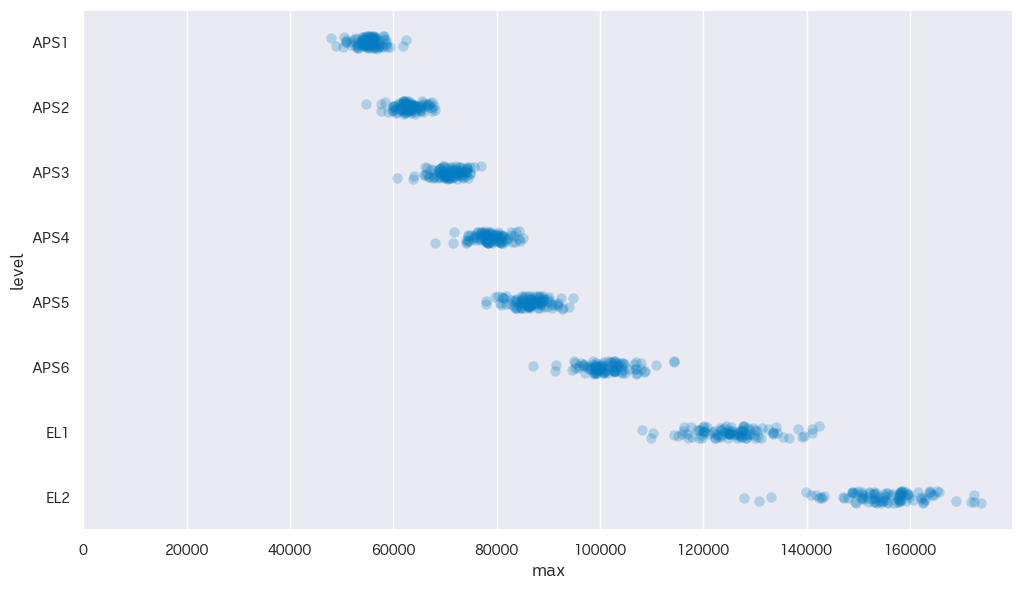

In [102]:
fig, ax = plt.subplots(
    figsize=(12, 6.75)
)

sns.stripplot(
    data=pay_data,
    x="max",
    y="level",
    ax=ax,
    s=7.5,
    alpha=.25
)
plt.xlim(0, )
